C:\Users\maxim\AppData\Local\Temp\ipykernel_34208\2458963753.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = data.applymap(lambda x: 1 if x > threshold_value else 0)
C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Full association rules file is saved. Now filtering rules where lift > 2.2...
Filtered association rules saved to filtered_unique_association_rules_lift_above_2.csv. You can manually download the file from your Jupyter Notebook environment.


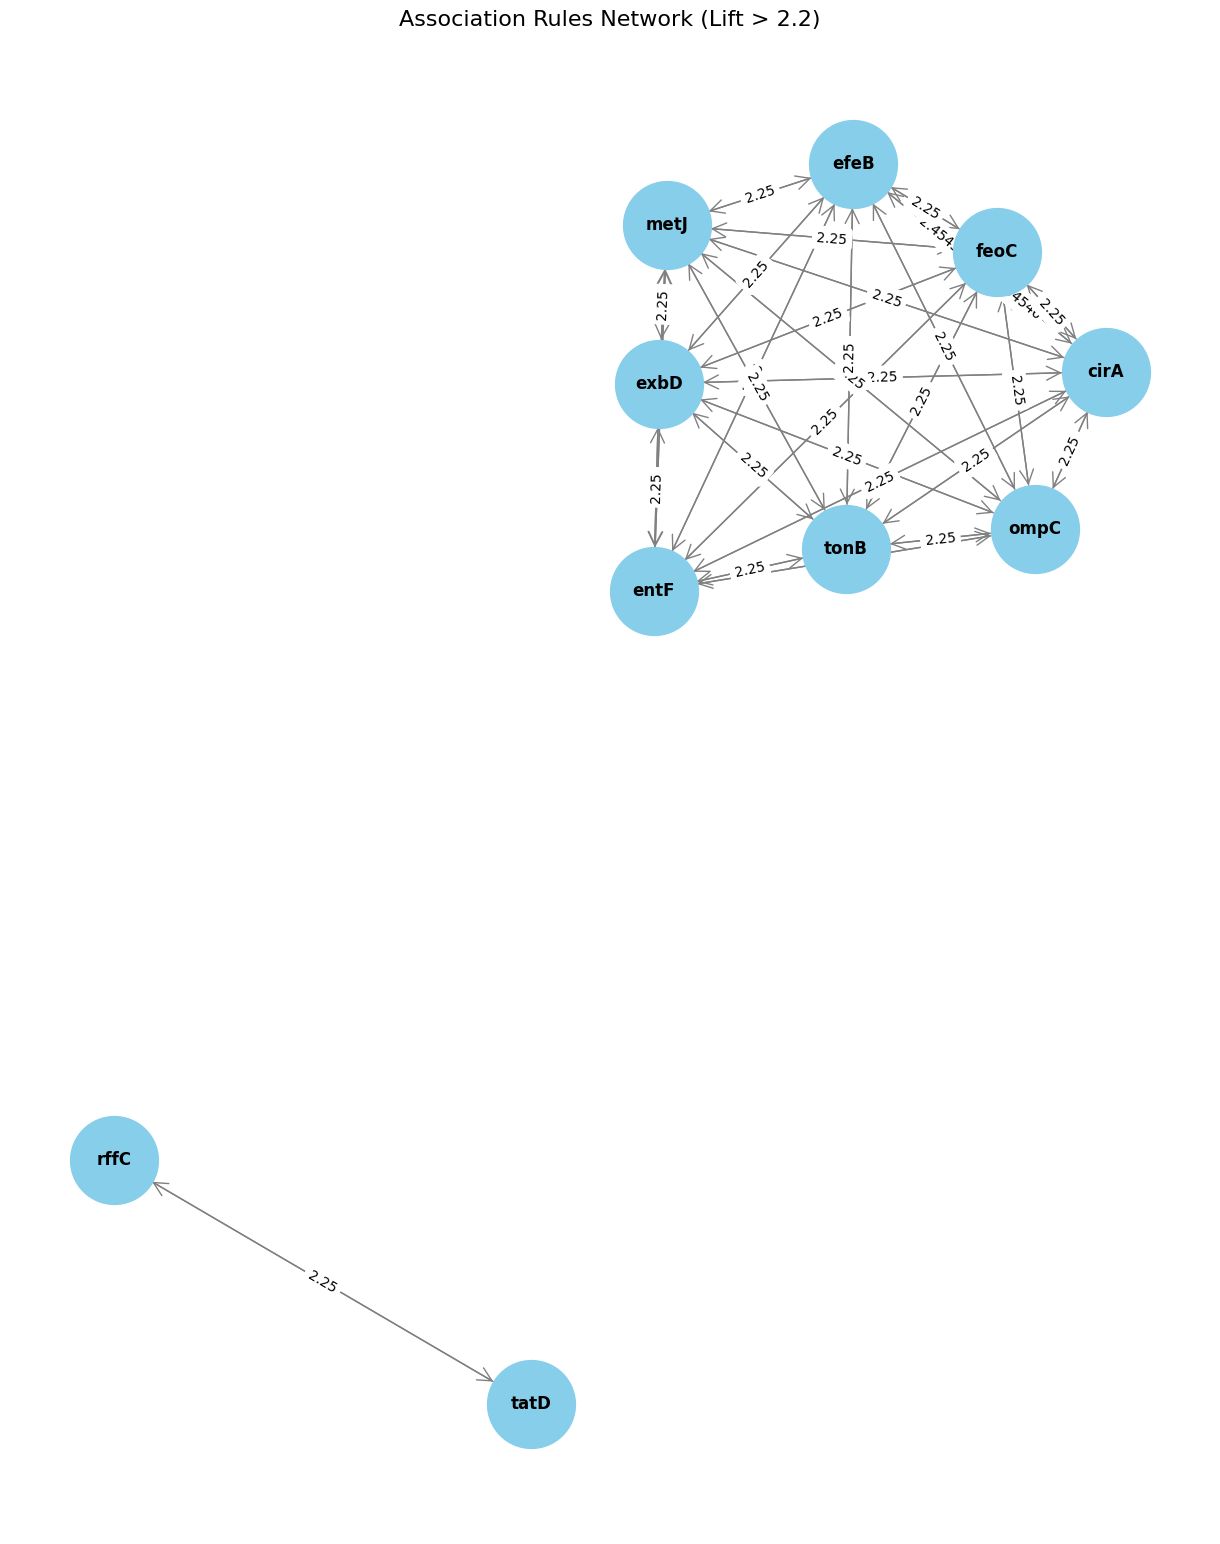

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv('norm_modified.csv', index_col=0)

# Step 3: Set a threshold for gene expression levels to be considered "present"
threshold_value = 100  # Modify this threshold based on your requirement

# Step 4: Convert the DataFrame to a binary format (1 if expression > threshold, 0 otherwise)
binary_data = data.applymap(lambda x: 1 if x > threshold_value else 0)

# Step 5: Transpose the binary DataFrame (so genes become rows, and samples become columns)
transposed_binary_data = binary_data.T

# Step 6: Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(transposed_binary_data, min_support=0.4, use_colnames=True, max_len=2)

# Step 7: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.3)

# Step 8: Convert frozensets to strings for readability
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Step 9: Select only the required columns: antecedents, consequents, support, confidence, and lift
rules_filtered_columns = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Step 10: Save the full association rules with only the selected columns to a CSV file
rules_file_path = "association_rules_filtered_columns.csv"
rules_filtered_columns.to_csv(rules_file_path, index=False)

print("Full association rules file is saved. Now filtering rules where lift > 2.2...")

# Step 11: Filter rules where lift is greater than 2.2
rules_lift_above_2 = rules_filtered_columns[rules_filtered_columns['lift'] > 2.2]

# Step 12: Remove rules where gene names repeat between antecedents and consequents
def has_unique_genes(row):
    antecedents = set(row['antecedents'].split(', '))
    consequents = set(row['consequents'].split(', '))
    return antecedents.isdisjoint(consequents)

# Apply the unique gene filter
rules_lift_above_2_unique = rules_lift_above_2[rules_lift_above_2.apply(has_unique_genes, axis=1)]

# Step 13: Save the filtered rules (lift > 2.2 and unique genes) to a new CSV file
filtered_rules_file_path = "filtered_unique_association_rules_lift_above_2.csv"
rules_lift_above_2_unique.to_csv(filtered_rules_file_path, index=False)

print(f"Filtered association rules saved to {filtered_rules_file_path}. You can manually download the file from your Jupyter Notebook environment.")

# Step 14: Create and plot the network graph for rules with lift > 2.2
def create_network(rules_df):
    G = nx.DiGraph()  # Directed graph
    for index, row in rules_df.iterrows():
        G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])
    return G

def plot_network(G):
    pos = nx.spring_layout(G, k=1.5, seed=42)  # Increase the 'k' value for better spacing between nodes
    plt.figure(figsize=(12, 15))

    # Draw the network with customized node and label sizes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=4000, font_size=12, font_weight='bold',
            edge_color='gray', arrows=True, arrowstyle='->', arrowsize=25)

    # Add edge labels (the lift values) and position them more clearly
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)

    # Use a larger title for clarity
    plt.title('Association Rules Network (Lift > 2.2)', fontsize=16)
    plt.show()

# Step 15: Build and plot the network for filtered rules
network_graph = create_network(rules_lift_above_2_unique)
plot_network(network_graph)
